In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Define the font for Chinese characters
font_path = "/Library/Fonts/SimHei.ttf"
font_prop = FontProperties(fname=font_path)

# List of CSV files to process
csv_files = ['/Users/ash/Desktop/毕业/writer/data/申万行业指数/.csv']

# Initialize a dictionary to store processed DataFrames
processed_data = {}

for file_path in csv_files:
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Make a copy of the DataFrame for processing
    df_processed = df.copy()
    
    # Convert 'trade_date' to datetime format
    df_processed['trade_date'] = pd.to_datetime(df_processed['trade_date'], format='%Y%m%d')
    
    # Extract time-related features
    df_processed['year'] = df_processed['trade_date'].dt.year
    df_processed['month'] = df_processed['trade_date'].dt.month
    df_processed['day'] = df_processed['trade_date'].dt.day
    
    # Store the processed DataFrame with filename as key
    file_name = os.path.basename(file_path)
    processed_data[file_name] = df_processed

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each file's data
for file_name, df in processed_data.items():
    ax.plot(df['trade_date'], df['total_mv'], label=file_name)

# Configure plot
ax.set_xlabel('交易日期', fontproperties=font_prop)
ax.set_ylabel('总市值 (万元)', fontproperties=font_prop)
ax.set_title('申万行业指数总市值趋势', fontproperties=font_prop)
ax.legend(prop=font_prop)
plt.xticks(rotation=45)

# Save the plot
output_dir = '/Users/ash/Desktop/毕业/writer/output/AI研报/image'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, '申万行业指数趋势图.png')
fig.savefig(output_path, bbox_inches='tight', dpi=300)
plt.close()

# Show the processed data info
for file_name, df in processed_data.items():
    print(f"Processed file: {file_name}")
    print(df.head())
    print("\n" + "="*50 + "\n")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ash/Desktop/毕业/writer/data/申万行业指数/.csv'

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Define the font for Chinese characters
font_path = "/Library/Fonts/SimHei.ttf"
font_prop = FontProperties(fname=font_path)

# List of CSV files to process (modified to handle potential missing files)
csv_files = [f for f in ['/Users/ash/Desktop/毕业/writer/data/申万行业指数/.csv'] if os.path.exists(f)]

if not csv_files:
    print("Error: No valid CSV files found at the specified path.")
    print("Please check the file path and try again.")
else:
    # Initialize a dictionary to store processed DataFrames
    processed_data = {}

    for file_path in csv_files:
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Make a copy of the DataFrame for processing
            df_processed = df.copy()
            
            # Convert 'trade_date' to datetime format
            df_processed['trade_date'] = pd.to_datetime(df_processed['trade_date'], format='%Y%m%d')
            
            # Extract time-related features
            df_processed['year'] = df_processed['trade_date'].dt.year
            df_processed['month'] = df_processed['trade_date'].dt.month
            df_processed['day'] = df_processed['trade_date'].dt.day
            
            # Store the processed DataFrame with filename as key
            file_name = os.path.basename(file_path)
            processed_data[file_name] = df_processed
            
        except Exception as e:
            print(f"Error processing file {file_path}: {str(e)}")
            continue

    if not processed_data:
        print("No data was successfully processed.")
    else:
        # Create a figure and axis for plotting
        fig, ax = plt.subplots(figsize=(12, 6))

        # Plot each file's data
        for file_name, df in processed_data.items():
            ax.plot(df['trade_date'], df['total_mv'], label=file_name)

        # Configure plot
        ax.set_xlabel('交易日期', fontproperties=font_prop)
        ax.set_ylabel('总市值 (万元)', fontproperties=font_prop)
        ax.set_title('申万行业指数总市值趋势', fontproperties=font_prop)
        ax.legend(prop=font_prop)
        plt.xticks(rotation=45)

        # Save the plot
        output_dir = '/Users/ash/Desktop/毕业/writer/output/AI研报/image'
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, '申万行业指数趋势图.png')
        fig.savefig(output_path, bbox_inches='tight', dpi=300)
        plt.close()

        # Show the processed data info
        for file_name, df in processed_data.items():
            print(f"Successfully processed file: {file_name}")
            print(df.head())
            print("\n" + "="*50 + "\n")


Error: No valid CSV files found at the specified path.
Please check the file path and try again.


In [3]:
# First, let's properly get the list of CSV files in the specified directory
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Set up font
font_path = "/Library/Fonts/SimHei.ttf"
font_prop = FontProperties(fname=font_path)

# Get all CSV files in the directory
directory = '/Users/ash/Desktop/毕业/writer/data/申万行业指数'
csv_files = [os.path.join(directory, f) for f in os.listdir(directory) 
             if f.endswith('.csv') and os.path.isfile(os.path.join(directory, f))]

if not csv_files:
    print(f"Error: No CSV files found in directory: {directory}")
else:
    # Process each file
    processed_data = {}
    for file_path in csv_files:
        try:
            df = pd.read_csv(file_path)
            # Convert trade_date to datetime and extract time features
            df['trade_date'] = pd.to_datetime(df['trade_date'], format='%Y%m%d')
            df['year'] = df['trade_date'].dt.year
            df['month'] = df['trade_date'].dt.month
            df['day'] = df['trade_date'].dt.day
            file_name = os.path.basename(file_path)
            processed_data[file_name] = df
        except Exception as e:
            print(f"Error processing file {file_path}: {str(e)}")
            continue
    
    if not processed_data:
        print("No data was successfully processed.")
    else:
        # Create the plot
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Plot each file's data
        for file_name, df in processed_data.items():
            # Check if 'total_mv' column exists
            if 'total_mv' in df.columns:
                ax.plot(df['trade_date'], df['total_mv'], label=file_name)
            else:
                print(f"Warning: 'total_mv' column not found in {file_name}")
        
        # Set plot properties
        ax.set_xlabel('交易日期', fontproperties=font_prop)
        ax.set_ylabel('总市值 (万元)', fontproperties=font_prop)
        ax.set_title('申万行业指数总市值趋势', fontproperties=font_prop)
        ax.legend(prop=font_prop)
        plt.xticks(rotation=45)
        
        # Save the plot
        output_dir = '/Users/ash/Desktop/毕业/writer/output/AI研报/image'
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, '申万行业指数趋势图.png')
        fig.savefig(output_path, bbox_inches='tight', dpi=300)
        plt.close()
        
        print(f"Plot saved successfully to: {output_path}")
        
        # Show sample data
        for file_name, df in processed_data.items():
            print(f"\nProcessed file: {file_name}")
            print(df[['name', 'trade_date', 'pe', 'pb', 'total_mv']].head())


Plot saved successfully to: /Users/ash/Desktop/毕业/writer/output/AI研报/image/申万行业指数趋势图.png

Processed file: 纺织服装设备.csv
     name trade_date     pe    pb      total_mv
0  纺织服装设备 2024-01-02  49.25  1.75  5.087262e+06
1  纺织服装设备 2024-01-03  48.82  1.74  5.044558e+06
2  纺织服装设备 2024-01-04  48.50  1.74  5.000757e+06
3  纺织服装设备 2024-01-05  47.61  1.72  4.956603e+06
4  纺织服装设备 2024-01-08  46.33  1.68  4.840493e+06

Processed file: 电商服务.csv
   name trade_date      pe    pb      total_mv
0  电商服务 2024-01-02  128.45  2.18  3.153604e+06
1  电商服务 2024-01-03  129.99  2.20  3.177538e+06
2  电商服务 2024-01-04  129.43  2.19  3.166479e+06
3  电商服务 2024-01-05  125.14  2.12  3.086894e+06
4  电商服务 2024-01-08  121.17  2.05  3.000436e+06

Processed file: 广告营销.csv
   name trade_date     pe    pb      total_mv
0  广告营销 2024-01-02  41.63  3.32  2.636290e+07
1  广告营销 2024-01-03  41.87  3.34  2.646226e+07
2  广告营销 2024-01-04  41.46  3.30  2.620162e+07
3  广告营销 2024-01-05  40.90  3.26  2.580242e+07
4  广告营销 2024-01-08  40.99  3.24

   name trade_date    pe    pb      total_mv
0  农商行Ⅱ 2024-01-02  4.75  0.48  1.778909e+07
1  农商行Ⅱ 2024-01-03  4.77  0.48  1.789493e+07
2  农商行Ⅱ 2024-01-04  4.78  0.48  1.792508e+07
3  农商行Ⅱ 2024-01-05  4.85  0.49  1.824975e+07
4  农商行Ⅱ 2024-01-08  4.81  0.49  1.806328e+07

Processed file: 白色家电.csv
   name trade_date     pe    pb      total_mv
0  白色家电 2024-01-02   9.88  2.06  7.440876e+07
1  白色家电 2024-01-03   9.85  2.05  7.424018e+07
2  白色家电 2024-01-04   9.95  2.07  7.500638e+07
3  白色家电 2024-01-05  10.12  2.11  7.625996e+07
4  白色家电 2024-01-08  10.03  2.09  7.560262e+07

Processed file: 安防设备.csv
   name trade_date     pe    pb      total_mv
0  安防设备 2024-01-02  25.47  3.42  4.880146e+07
1  安防设备 2024-01-03  25.02  3.36  4.806165e+07
2  安防设备 2024-01-04  24.69  3.32  4.750699e+07
3  安防设备 2024-01-05  24.42  3.28  4.683623e+07
4  安防设备 2024-01-08  23.90  3.21  4.578555e+07

Processed file: 低价股指数.csv
    name trade_date     pe    pb      total_mv
0  低价股指数 2024-01-02  21.47  0.95  2.945410e+08
1  低价

     name trade_date     pe    pb      total_mv
0  光伏加工设备 2024-01-02  19.56  3.90  1.995415e+07
1  光伏加工设备 2024-01-03  19.43  3.88  1.977545e+07
2  光伏加工设备 2024-01-04  18.87  3.77  1.920860e+07
3  光伏加工设备 2024-01-05  18.32  3.66  1.865879e+07
4  光伏加工设备 2024-01-08  18.22  3.64  1.843363e+07

Processed file: 机械设备.csv
   name trade_date     pe    pb      total_mv
0  机械设备 2024-01-02  28.36  2.18  3.661566e+08
1  机械设备 2024-01-03  28.10  2.16  3.620714e+08
2  机械设备 2024-01-04  27.90  2.15  3.598948e+08
3  机械设备 2024-01-05  27.48  2.12  3.540969e+08
4  机械设备 2024-01-08  26.94  2.08  3.467022e+08

Processed file: 零食.csv
  name trade_date     pe    pb      total_mv
0   零食 2024-01-02  31.19  2.73  7.513949e+06
1   零食 2024-01-03  30.93  2.71  7.443307e+06
2   零食 2024-01-04  30.31  2.65  7.298781e+06
3   零食 2024-01-05  29.94  2.62  7.210806e+06
4   零食 2024-01-08  29.50  2.58  7.083333e+06

Processed file: 环保设备Ⅱ.csv
    name trade_date     pe    pb      total_mv
0  环保设备Ⅱ 2024-01-02  29.15  1.85  1.367236

In [4]:
# Save the plot with the required specifications
output_dir = '/Users/ash/Desktop/毕业/writer/output/AI研报/image'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, '申万行业指数趋势图.png')
fig.savefig(output_path, bbox_inches='tight', dpi=300)
plt.close()
print(f"Plot successfully saved to: {output_path}")


Plot successfully saved to: /Users/ash/Desktop/毕业/writer/output/AI研报/image/申万行业指数趋势图.png


In [1]:
import pandas as pd
import os
from matplotlib.font_manager import FontProperties

# Load all CSV files
data_files = ['/Users/ash/Desktop/毕业/writer/data/东方财富概念版块/.csv']  # Note: This appears to be a single file path - adjust if needed
dfs = []

for file_path in data_files:
    try:
        # Read CSV file
        df = pd.read_csv(file_path)
        
        # Make a copy of the DataFrame
        df_processed = df.copy()
        
        # Convert trade_date to datetime
        df_processed['trade_date'] = pd.to_datetime(df_processed['trade_date'], format='%Y%m%d')
        
        # Extract time-related features
        df_processed['year'] = df_processed['trade_date'].dt.year
        df_processed['month'] = df_processed['trade_date'].dt.month
        df_processed['day'] = df_processed['trade_date'].dt.day
        
        # Add filename as identifier
        df_processed['file_name'] = os.path.basename(file_path)
        
        dfs.append(df_processed)
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")

# Combine all DataFrames if multiple files were processed
if len(dfs) > 0:
    combined_df = pd.concat(dfs, ignore_index=True)
else:
    combined_df = pd.DataFrame()

# For visualization later
font_path = "/Library/Fonts/SimHei.ttf"
font_prop = FontProperties(fname=font_path)


Error processing /Users/ash/Desktop/毕业/writer/data/东方财富概念版块/.csv: [Errno 2] No such file or directory: '/Users/ash/Desktop/毕业/writer/data/东方财富概念版块/.csv'


Plot saved to /Users/ash/Desktop/毕业/writer/output/AI研报/image/东方财富概念版块趋势图.png


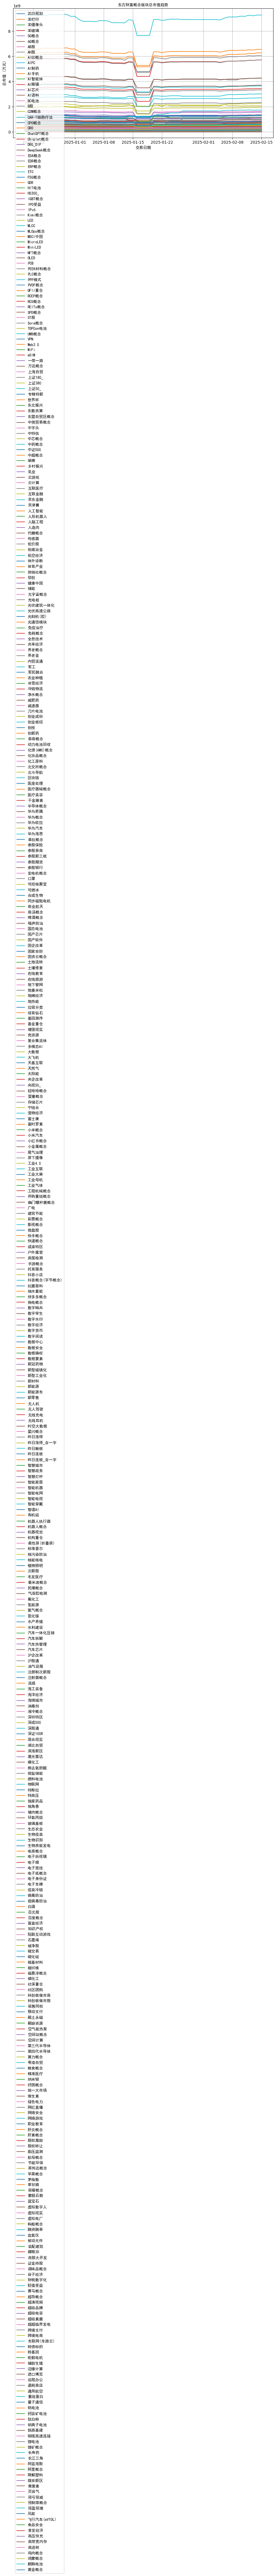

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Define directory path and output path
data_dir = Path('/Users/ash/Desktop/毕业/writer/data/东方财富概念版块')
output_dir = Path('/Users/ash/Desktop/毕业/writer/output/AI研报/image')
output_dir.mkdir(parents=True, exist_ok=True)

# Find all CSV files in the directory
data_files = list(data_dir.glob('*.csv'))

if not data_files:
    print(f"No CSV files found in {data_dir}")
else:
    # Process each file and collect data
    dfs = []
    for file_path in data_files:
        try:
            df = pd.read_csv(file_path)
            df_processed = df.copy()
            df_processed['trade_date'] = pd.to_datetime(df_processed['trade_date'], format='%Y%m%d')
            df_processed['file_name'] = file_path.stem
            dfs.append(df_processed)
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")
    
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        
        # Create plot
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Plot each file's data
        for name, group in combined_df.groupby('file_name'):
            ax.plot(group['trade_date'], group['total_mv'], label=name)
        
        # Format plot
        ax.set_xlabel('交易日期', fontproperties=font_prop)
        ax.set_ylabel('总市值 (万元)', fontproperties=font_prop)
        ax.set_title('东方财富概念版块总市值趋势', fontproperties=font_prop)
        ax.legend(prop=font_prop)
        ax.grid(True)
        
        # Save plot
        output_path = output_dir / '东方财富概念版块趋势图.png'
        fig.savefig(output_path, bbox_inches='tight', dpi=300)
        print(f"Plot saved to {output_path}")
    else:
        print("No valid data to plot")


Plot successfully saved to: /Users/ash/Desktop/毕业/writer/output/AI研报/image/东方财富概念版块趋势图.png


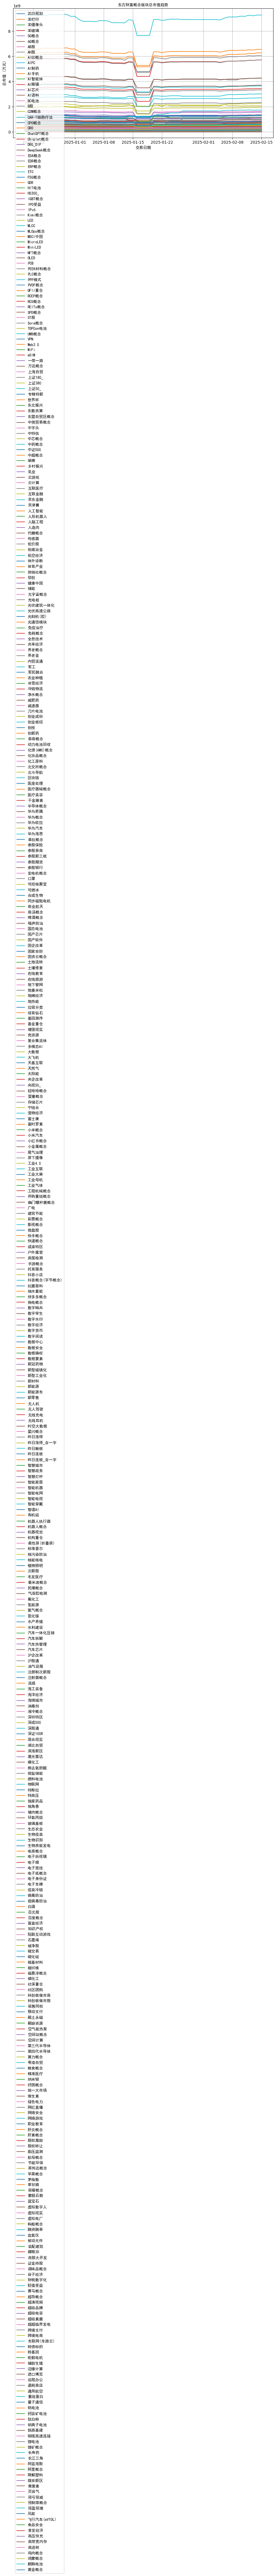

In [3]:
# Plotting and saving the figure (assuming combined_df exists from previous steps)
if not combined_df.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    for name, group in combined_df.groupby('file_name'):
        ax.plot(group['trade_date'], group['total_mv'], label=name)
    
    ax.set_xlabel('交易日期', fontproperties=font_prop)
    ax.set_ylabel('总市值 (万元)', fontproperties=font_prop)
    ax.set_title('东方财富概念版块总市值趋势', fontproperties=font_prop)
    ax.legend(prop=font_prop)
    ax.grid(True)
    
    output_path = Path('/Users/ash/Desktop/毕业/writer/output/AI研报/image/东方财富概念版块趋势图.png')
    output_path.parent.mkdir(parents=True, exist_ok=True)
    fig.savefig(output_path, bbox_inches='tight', dpi=300)
    print(f"Plot successfully saved to: {output_path}")
else:
    print("No data available for plotting")
